+ Workload: HOT
+ Regions: 3
+ Scale factor: 30 (10000 rows per region)
+ Terminals: 32
+ Each transaction
  + 4 keys, 2 hot, 2 cold
  + If multi-region: 1 hot 1 cold from home region, 1 hot 1 cold from remote region

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Read a file where each line has the following format:
#  <transaction id>: <key>
# and store the data in a pandas dataframe.
def read_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        line = line.strip()
        if line == '':
            continue
        tid, key = line.split(':')
        data.append([tid, int(key)])
    df = pd.DataFrame(data, columns=['tid', 'key'])
    return df


def plot_hists(mr, hot):
    fig, ax = plt.subplots(3, 1, figsize=(20, 6), sharex=True, sharey=True)
    colors = ['red', 'green', 'blue']
    for r in range(3):
        df = read_file(f"./mr{mr}hot{hot}region{r+1}.txt")
        df.hist(density=True, ax=ax[r], bins=300, alpha=0.8, color=colors[r])
        ax[r].set_xlim(0, 30000)
        ax[r].set_ylabel(f"Region {r+1}")
        ax[r].set_xlabel("Key")
        if r == 0:
            ax[r].set_title(f"MR={mr}, Hot={hot}")
        else:
            ax[r].set_title("")

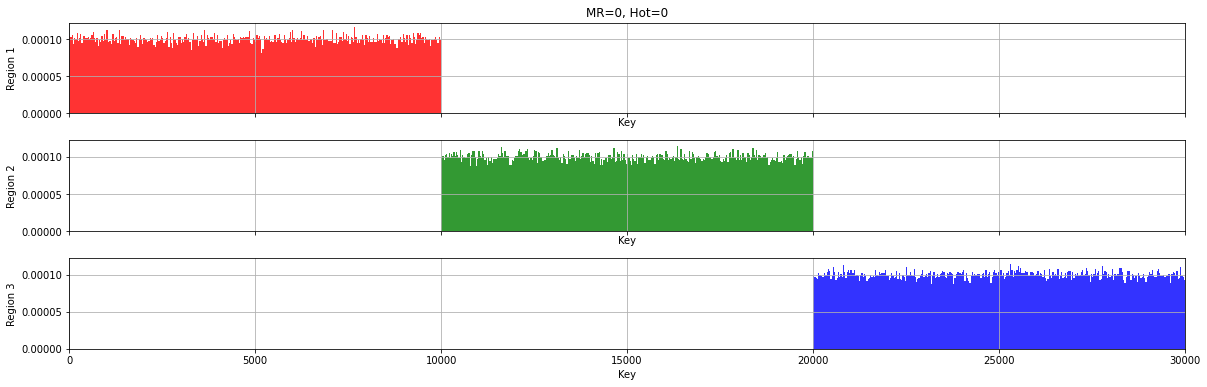

In [59]:
plot_hists(mr=0, hot=0)

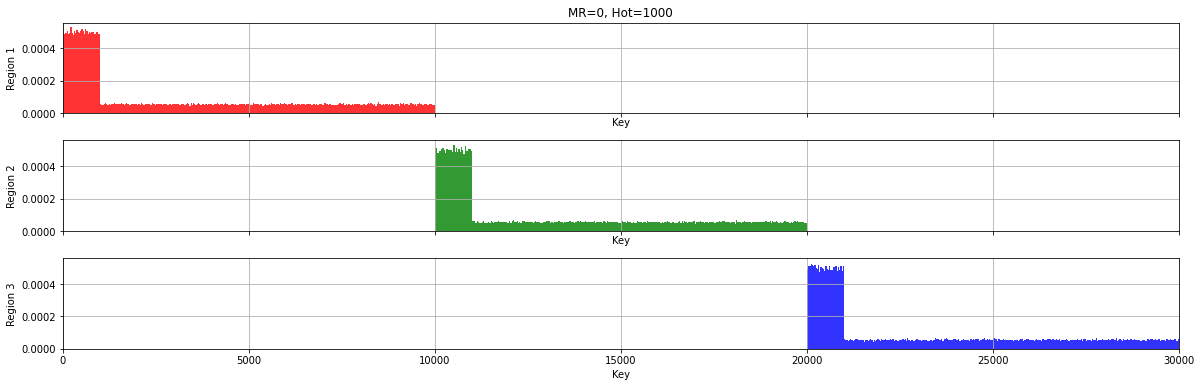

In [60]:
plot_hists(mr=0, hot=1000)

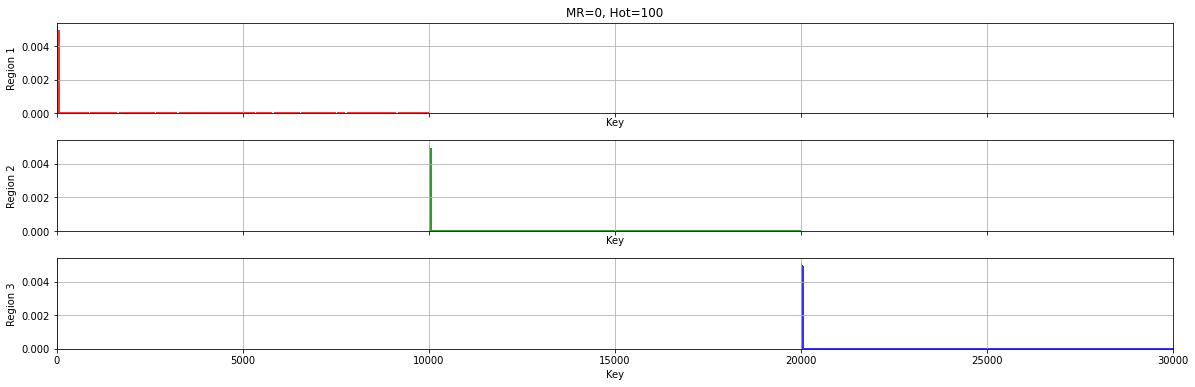

In [61]:
plot_hists(mr=0, hot=100)

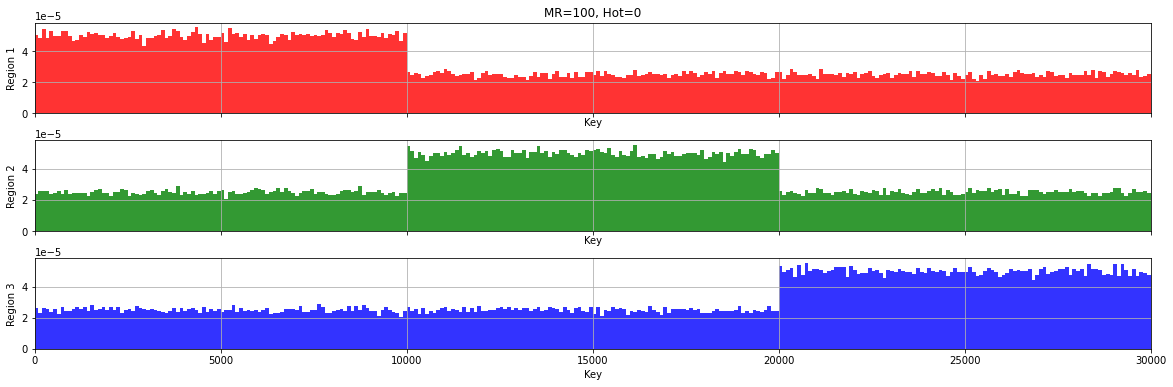

In [62]:
plot_hists(mr=100, hot=0)

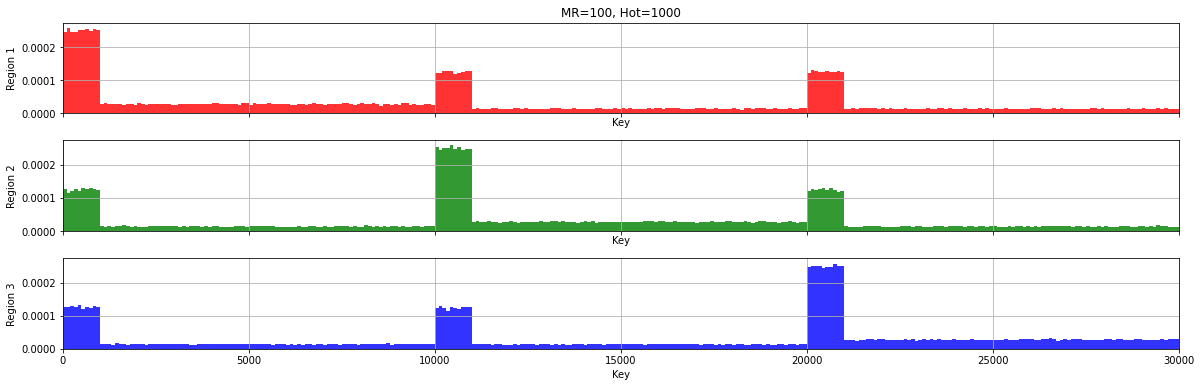

In [63]:
plot_hists(mr=100, hot=1000)

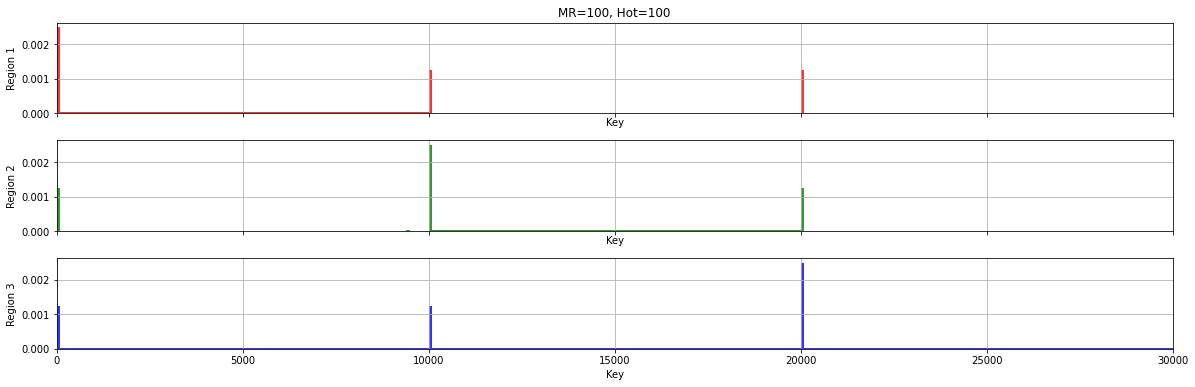

In [64]:
plot_hists(mr=100, hot=100)